<a href="https://colab.research.google.com/github/puneethkumarvydya/Capstone-Project/blob/Gopi's-Branch/Capstone_Project_AIML.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
import os
os.chdir('/content/drive/My Drive')
path = '.'

In [5]:
pip install pydicom

     |████████████████████████████████| 1.9MB 2.7MB/s 


In [ ]:
import os
count = 0
d = "stage_2_train_images"
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        count += 1
print("Total Training images:")
print(count)

Total Training images:
26684


In [ ]:
import os
count = 0
d = "stage_2_test_images"
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        count += 1
print("Total Testing images:")
print(count)

Total Testing images:
3000


In [ ]:
min_size = os.path.getsize('stage_2_train_images/000db696-cf54-4385-b10b-6b16fbb3f985.dcm')
max_size = os.path.getsize('stage_2_train_images/000db696-cf54-4385-b10b-6b16fbb3f985.dcm')
d = "stage_2_train_images"
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        size = os.path.getsize(d + "/" + path)
        if size < min_size:
            min_size = size
            min_filename = path
        if size > max_size:
            max_size = size
            max_filename = path
            
print(min_size)
print(max_size)

46234
370560


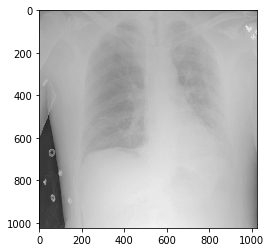

In [ ]:
import pydicom as dicom
import matplotlib.pylab as plt

image_path = 'stage_2_train_images/' + min_filename
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap='gray')

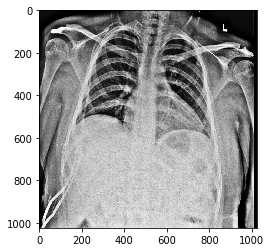

In [ ]:
image_path = 'stage_2_train_images/' + max_filename
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array, cmap='gray')

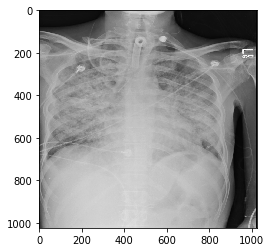

In [ ]:
image_path = 'stage_2_train_images/000fe35a-2649-43d4-b027-e67796d412e0.dcm'
ds = dicom.dcmread(image_path)

plt.imshow(ds.pixel_array,cmap='gray')

In [ ]:
min_size = os.path.getsize('stage_2_test_images/0000a175-0e68-4ca4-b1af-167204a7e0bc.dcm')
max_size = os.path.getsize('stage_2_test_images/0000a175-0e68-4ca4-b1af-167204a7e0bc.dcm')
d = "stage_2_test_images"
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        size = os.path.getsize(d + "/" + path)
        if size < min_size:
            min_size = size
            min_filename = path
        if size > max_size:
            max_size = size
            max_filename = path
            
print(min_size)
print(max_size)

46242
189830


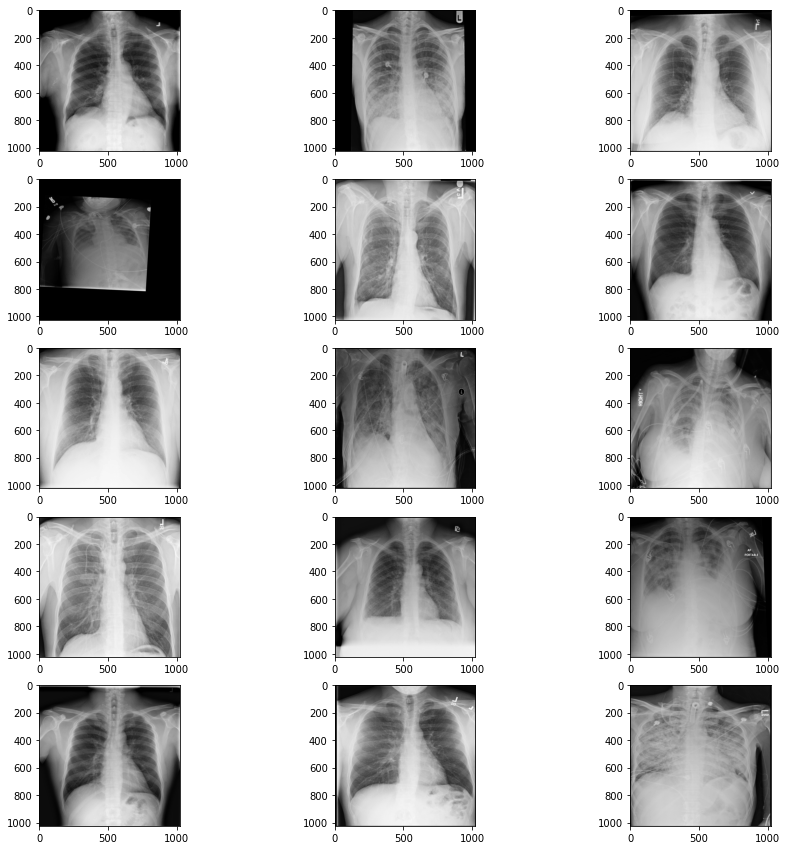

In [6]:
import pydicom as dicom
import matplotlib.pylab as plt
import os

count = 1
plt.figure(figsize= (15,15))
d = "images"
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        ds = dicom.dcmread(d + "/" + path)
        plt.subplot(5,3,count)
        plt.imshow(ds.pixel_array,cmap='gray')
        count += 1

In [ ]:
image_path = 'stage_2_train_images/000db696-cf54-4385-b10b-6b16fbb3f985.dcm'
ds = dicom.dcmread(image_path, force = True)

ds
#plt.imshow(ds.pixel_array,cmap='gray')

Dataset.file_meta -------------------------------
(0002, 0000) File Meta Information Group Length  UL: 200
(0002, 0001) File Meta Information Version       OB: b'\x00\x01'
(0002, 0002) Media Storage SOP Class UID         UI: Secondary Capture Image Storage
(0002, 0003) Media Storage SOP Instance UID      UI: 1.2.276.0.7230010.3.1.4.8323329.4475.1517874307.936345
(0002, 0010) Transfer Syntax UID                 UI: JPEG Baseline (Process 1)
(0002, 0012) Implementation Class UID            UI: 1.2.276.0.7230010.3.0.3.6.0
(0002, 0013) Implementation Version Name         SH: 'OFFIS_DCMTK_360'
-------------------------------------------------
(0008, 0005) Specific Character Set              CS: 'ISO_IR 100'
(0008, 0016) SOP Class UID                       UI: Secondary Capture Image Storage
(0008, 0018) SOP Instance UID                    UI: 1.2.276.0.7230010.3.1.4.8323329.4475.1517874307.936345
(0008, 0020) Study Date                          DA: '19010101'
(0008, 0030) Study Time        

In [ ]:
dat1 = ds[16,32].value
dat2 = ds[16,64].value
dat3 = ds[16,4112].value
dat4 = ds[24,21].value

In [ ]:
import pickle

d = "stage_2_train_images"
data = ""
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        ds = dicom.dcmread(d + "/" + path)
        dat1 = ds[16,32].value
        dat2 = ds[16,64].value
        dat3 = ds[16,4112].value
        dat4 = ds[24,21].value
        data = data + dat1 + ',' + dat2 + ',' + dat3 + ',' + dat4 + ',' + '\n'
        with open('images_more_data_train.csv', 'wb') as fp:
            pickle.dump(data, fp)

In [ ]:
d = "stage_2_test_images"
data = ""
for path in os.listdir(d):
    if os.path.isfile(os.path.join(d, path)):
        ds = dicom.dcmread(d + "/" + path)
        dat1 = ds[16,32].value
        dat2 = ds[16,64].value
        dat3 = ds[16,4112].value
        dat4 = ds[24,21].value
        data = data + dat1 + ',' + dat2 + ',' + dat3 + ',' + dat4 + ',' + '\n'
        with open('images_more_data_test.csv', 'wb') as fp:
            pickle.dump(data, fp)

In [ ]:
count

3000

In [ ]:
import pandas as pd

class_info = pd.read_csv("stage_2_detailed_class_info.csv")

In [ ]:
class_info.shape

(30227, 2)

In [ ]:
class_info.head(10)

,patientId,class
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,No Lung Opacity / Not Normal
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,No Lung Opacity / Not Normal
2,00322d4d-1c29-4943-afc9-b6754be640eb,No Lung Opacity / Not Normal
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,Normal
4,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
5,00436515-870c-4b36-a041-de91049b9ab4,Lung Opacity
6,00569f44-917d-4c86-a842-81832af98c30,No Lung Opacity / Not Normal
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,No Lung Opacity / Not Normal
8,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity
9,00704310-78a8-4b38-8475-49f4573b2dbb,Lung Opacity


In [ ]:
class_info.describe()

,patientId,class
count,30227,30227
unique,26684,3
top,3239951b-6211-4290-b237-3d9ad17176db,No Lung Opacity / Not Normal
freq,4,11821


In [ ]:
class_info['class'].unique()

array(['No Lung Opacity / Not Normal', 'Normal', 'Lung Opacity'],
      dtype=object)

In [ ]:
class_info['class'].value_counts()

No Lung Opacity / Not Normal    11821
Lung Opacity                     9555
Normal                           8851
Name: class, dtype: int64

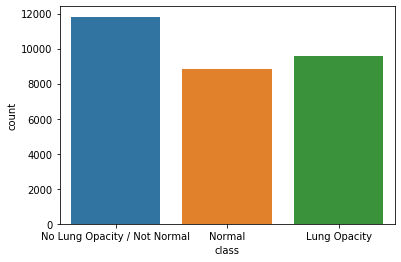

In [ ]:
import seaborn as sb

sb.countplot(x='class',data=class_info)

In [ ]:
class_info.isnull().sum()

patientId    0
class        0
dtype: int64

In [ ]:
train_labels = pd.read_csv("stage_2_train_labels.csv")

In [ ]:
train_labels.shape

(30227, 6)

In [ ]:
train_labels.head(10)

,patientId,x,y,width,height,Target
0,0004cfab-14fd-4e49-80ba-63a80b6bddd6,NaN,NaN,NaN,NaN,0
1,00313ee0-9eaa-42f4-b0ab-c148ed3241cd,NaN,NaN,NaN,NaN,0
2,00322d4d-1c29-4943-afc9-b6754be640eb,NaN,NaN,NaN,NaN,0
3,003d8fa0-6bf1-40ed-b54c-ac657f8495c5,NaN,NaN,NaN,NaN,0
4,00436515-870c-4b36-a041-de91049b9ab4,264.0,152.0,213.0,379.0,1
5,00436515-870c-4b36-a041-de91049b9ab4,562.0,152.0,256.0,453.0,1
6,00569f44-917d-4c86-a842-81832af98c30,NaN,NaN,NaN,NaN,0
7,006cec2e-6ce2-4549-bffa-eadfcd1e9970,NaN,NaN,NaN,NaN,0
8,00704310-78a8-4b38-8475-49f4573b2dbb,323.0,577.0,160.0,104.0,1
9,00704310-78a8-4b38-8475-49f4573b2dbb,695.0,575.0,162.0,137.0,1


In [ ]:
train_labels.describe()

,x,y,width,height,Target
count,9555.000000,9555.000000,9555.000000,9555.000000,30227.000000
mean,394.047724,366.839560,218.471376,329.269702,0.316108
std,204.574172,148.940488,59.289475,157.750755,0.464963
min,2.000000,2.000000,40.000000,45.000000,0.000000
25%,207.000000,249.000000,177.000000,203.000000,0.000000
50%,324.000000,365.000000,217.000000,298.000000,0.000000
75%,594.000000,478.500000,259.000000,438.000000,1.000000
max,835.000000,881.000000,528.000000,942.000000,1.000000


In [ ]:
train_labels['Target'].unique()

array([0, 1], dtype=int64)

In [ ]:
train_labels['Target'].value_counts()

0    20672
1     9555
Name: Target, dtype: int64

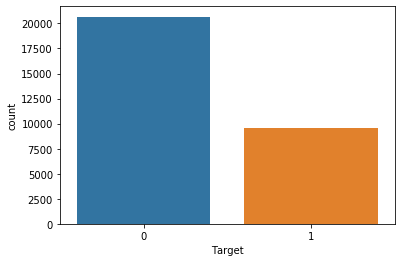

In [ ]:
sb.countplot(x='Target',data=train_labels)

In [ ]:
train_labels.isnull().sum()

patientId        0
x            20672
y            20672
width        20672
height       20672
Target           0
dtype: int64

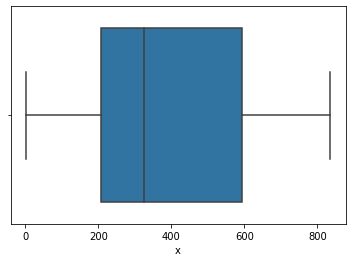

In [ ]:
sb.boxplot(x='x',data=train_labels)

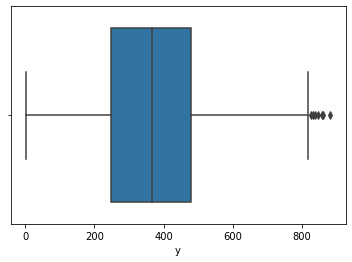

In [ ]:
sb.boxplot(x='y',data=train_labels)

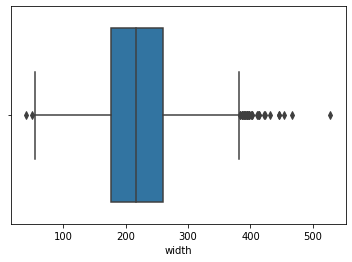

In [ ]:
sb.boxplot(x='width',data=train_labels)

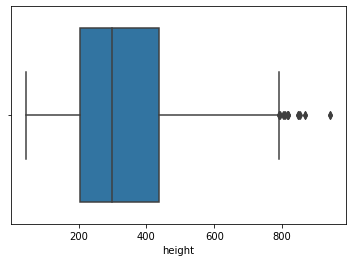

In [ ]:
sb.boxplot(x='height',data=train_labels)